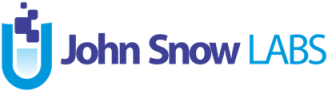

# 🚀 JohnSnowLabs Medical LLM Inference Server

### 🔄 The images required to run the llm have been pulled from 
 👉 [Docker Hub](https://hub.docker.com/r/johnsnowlabs/jsl-llms):


### 🐳 The containers are running at system startup


Check running the containers with:

```bash
docker ps
```
It should show 2 containers running, johnsnowlabs/jsl-llms:marketplace runs the model. 
ghcr.io/open-webui/open-webui:main runs webui to interact with the model.

```
CONTAINER ID   IMAGE                                COMMAND                  CREATED      STATUS                            PORTS                                         NAMES
4dbe81768b8b   johnsnowlabs/jsl-llms:marketplace    "./entrypoint.sh --m…"   2 days ago   Up 2 minutes (health: starting)   0.0.0.0:8080->8080/tcp, [::]:8080->8080/tcp   med-llm-cmp-jsl-llms-1
684bf3801bf8   ghcr.io/open-webui/open-webui:main   "bash start.sh"          2 days ago   Up 2 minutes (healthy)            0.0.0.0:3000->8080/tcp, [::]:3000->8080/tcp   open-webui
```
---

### 📜 View Container Logs

You can monitor the container logs with:

```bash
docker logs <container-id>
```

The logs will show important information such as:
- Model initialization and loading progress
- License validation status
- Server startup confirmation
- Memory usage and GPU configuration
- Model task capabilities
- Available API endpoints and routes
- Health check status


Example log entry for successful startup of johnsnowlabs/jsl-llms:marketplace:
```bash
INFO: Application startup complete.
llm-service [INFO] Server is healthy and model is loaded
INFO: Started server process [1]
INFO:     127.0.0.1:42154 - "GET /health HTTP/1.1" 200 OK
```

Once you see these messages, the service is ready to accept requests! 🎉

## Imports

In [1]:
import json
import requests

## Initial setup

In [2]:
prompt1 = "How do emerging mRNA technologies compare to traditional vaccine approaches for disease prevention?"

prompt2 = """Patients with xeroderma pigmentosum develop skin cancer when they are exposed to sunlight because they have a deficiency in:

A. An enzyme essential to repair mismatched bases.
B. UV specific endonuclease.
C. DNA polymerase I.
D. DNA polymerase III.
E. Glycosylase that removes uracil bases from DNA."""

system_prompt = """You are a medical expert that reviews the problem, does reasoning, and then gives a final answer.
Strictly follow this exact format for giving your output: /think

**Final Answer**: [Conclusive Answer]"""

# Health & Version:

In [3]:
url = "http://localhost:8080/health"
response = requests.get(url)
print("Health:", response.status_code, response.text)

Health: 200 


In [4]:
url = "http://localhost:8080/ping"
response = requests.post(url)
print("Ping:", response.status_code, response.text)

Ping: 200 


In [5]:
url = "http://localhost:8080/version"
response = requests.get(url)
print("Version:", response.json())

Version: {'version': '0.9.2'}


# Core Functionality:

### List available models

In [ ]:
url = "http://localhost:8080/v1/models"
response = requests.get(url)
print("Models:", response.json())

## Non-Streaming Responses

In [7]:
def get_completion_response(url, payload):
    """
    Handles non-streaming responses from both `/v1/chat/completions` and `/v1/completions`.

    Args:
        url (str): The endpoint URL.
        payload (dict): The request payload.

    Returns:
        str: The generated text (chat or completion).
    """
    response = requests.post(url, json=payload)

    if response.status_code == 200:
        data = response.json()
        
        choices = data.get("choices", [{}])

        res = dict()
        if "message" in choices[0]:
            res["content"] = choices[0]["message"].get("content", "")
            res["reasoning_content"] = choices[0]["message"].get("reasoning_content", "")
            return res

        return choices[0].get("text", "")
    else:
        print("Error:", response.status_code, response.text)
        return ""

### Chat completions

In [ ]:
url = "http://localhost:8080/v1/chat/completions"
payload = {
    "model": "Medical-LLM-Small",
    "messages": [
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": prompt1}
    ],
    "max_tokens": 2048,
    "temperature": 0.8,
    "top_p": 0.95,
}

response = get_completion_response(url, payload)
print(f"reasoning: {response['reasoning_content']}")
print(f"response: {response['content']}")

reasoning: 
Okay, I need to compare emerging mRNA technologies with traditional vaccine approaches for disease prevention. Let me start by recalling what I know about both.

Traditional vaccines usually use weakened or inactivated pathogens, or parts of them like proteins or polysaccharides. These stimulate the immune system to recognize and attack the actual pathogen if encountered later. Examples include the measles, flu shots, and HPV vaccines.

mRNA vaccines, on the other hand, use a piece of messenger RNA that instructs cells to produce a specific protein (like the spike protein in the case of COVID-19 vaccines). The immune system then recognizes this protein as foreign and mounts an immune response. The mRNA doesn't enter the nucleus and doesn't integrate into the genome, so it doesn't alter DNA.

Advantages of mRNA vaccines: They can be developed more quickly because they don't require growing the pathogen. This is why they were so fast for COVID-19. They can be easily modified 

For additional parameters and details, refer to:

- [ChatCompletionRequest](https://github.com/vllm-project/vllm/blob/v0.8.5/vllm/entrypoints/openai/protocol.py#L232)
- [OpenAI’s Chat Completions API](https://platform.openai.com/docs/api-reference/chat/create)

### Text completions

In [ ]:
url = "http://localhost:8080/v1/completions"
payload = {
    "model": "Medical-LLM-Small",
    "prompt": f"{system_prompt}\n\nUser: {prompt2}\n\nAssistant:",
    "max_tokens": 2048,
    "temperature": 0.8,
    "top_p": 0.95,
}

response = get_completion_response(url, payload)

print(f"response: {response}")

response:  **Review and Reasoning**: Xeroderma pigmentosum (XP) is a rare genetic disorder characterized by an extreme sensitivity to ultraviolet (UV) light, which leads to an increased risk of skin cancer. This condition is caused by a deficiency in the enzyme responsible for repairing UV-induced DNA damage, specifically the enzyme involved in nucleotide excision repair (NER). This enzyme is called UV-specific endonuclease. In individuals with XP, the deficiency in this enzyme leads to an inability to repair the damage caused by UV radiation, resulting in the accumulation of DNA mutations and an increased risk of skin cancer when exposed to sunlight. The other options are not correct because:

A. An enzyme essential to repair mismatched bases: This is not directly related to the specific enzyme deficiency in XP.
B. UV specific endonuclease: This is the correct answer and is the enzyme responsible for repairing UV-induced DNA damage.
C. DNA polymerase I: This is an enzyme involved in D

For further details and additional parameters, see:

- [CompletionRequest](https://github.com/vllm-project/vllm/blob/v0.8.5/vllm/entrypoints/openai/protocol.py#L730)
- [OpenAI’s Completions API](https://platform.openai.com/docs/api-reference/completions/create)

# Streaming Responses

In [10]:
def stream_response(url, payload):
    """
    Handles streaming responses from both `/v1/chat/completions` and `/v1/completions`.

    Args:
        url (str): The API endpoint URL.
        payload (dict): The JSON payload for the request.

    Prints the reconstructed streamed output in real-time.
    """
    response = requests.post(url, json=payload, stream=True)

    for chunk in response.iter_lines():
        if chunk:
            decoded = chunk.decode("utf-8")
            if decoded.startswith("data: "):
                data = decoded[len("data: "):]
                if data.strip() == "[DONE]":
                    break
                try:
                    parsed = json.loads(data)
                    choices = parsed.get("choices", [])
                    if not choices:
                        continue
                    choice = choices[0]

                    content = choice.get("delta", {}).get("content") or choice.get("text")
                    if content:
                        print(content, end="", flush=True)
                except (KeyError, json.JSONDecodeError):
                    continue


### Chat completions

In [ ]:
url = "http://localhost:8080/v1/chat/completions"

payload = {
    "model": "Medical-LLM-Small",
    "messages": [
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": prompt1}
    ],
    "max_tokens": 2048,
    "temperature": 0.8,
    "top_p": 0.95,
    "stream": True
}

stream_response(url, payload)



**Final Answer**: Emerging mRNA technologies offer faster development timelines, adaptability to new variants, and the absence of live viral components, which can enhance safety. However, they require cold chain storage and distribution, which can be logistically challenging. Traditional vaccines, while slower to develop and less adaptable to mutations, have a long-established safety profile, proven efficacy, and easier storage/distribution. The choice between them depends on the disease, context, and resource availability.

### Text completions

In [ ]:
url = "http://localhost:8080/v1/completions"

payload = {
    "model": "Medical-LLM-Small",
    "prompt": f"{system_prompt}\n\nUser: {prompt2}\n\nAssistant:",
    "max_tokens": 2048,
    "temperature": 0.8,
    "top_p": 0.95,
    "stream": True
}

stream_response(url, payload)

<think>
Okay, let's see. The question is about xeroderma pigmentosum and why patients develop skin cancer when exposed to sunlight. The options are all enzymes or proteins related to DNA repair.

First, I remember that xeroderma pigmentosum is a genetic disorder where the body can't repair DNA damage caused by UV light. So the main issue here is DNA repair deficiency.

The key part is the enzyme involved. The options mention different enzymes. Let me recall: Xeroderma pigmentosum is associated with defects in nucleotide excision repair (NER). The NER pathway is responsible for removing bulky DNA lesions, like those caused by UV-induced thymine dimers.

Looking at the options, option A says "an enzyme essential to repair mismatched bases." Wait, mismatch repair (MMR) is different from NER. MMR deals with base mismatches and small insertions/deletions, not the bulky lesions from UV. So maybe not A.

Option B is "UV specific endonuclease." The NER process involves several enzymes. One ste


## Additional Endpoints  
You can access other API routes depending on the model's capabilities. Check your server startup logs for supported tasks and their corresponding endpoints.

The full list of available routes is logged during service initialization.